In [1]:
import pandas as pd
import numpy as np
import random
import math
from scipy.stats import chi2_contingency, kstest, ks_2samp, ttest_ind
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 


import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns
import scipy
from sklearn.cluster import DBSCAN, KMeans
from scipy.spatial import distance_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import gower

In [3]:
from sklearn.preprocessing import normalize

In [4]:
df = pd.read_csv("loan_data_set.csv", sep=';')
df.shape

(614, 13)

In [5]:
df.dropna(subset=['Gender'], inplace=True)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
df.loc[df['LoanAmount'].isna(), 'LoanAmount'] = df.loc[~df['LoanAmount'].isna(), 'LoanAmount'].median()

In [7]:
binary_columns = ["Gender", "Married", "Education", 'Credit_History', 'Property_Area']

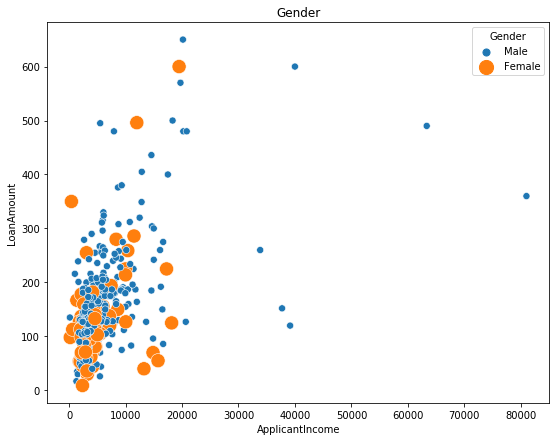

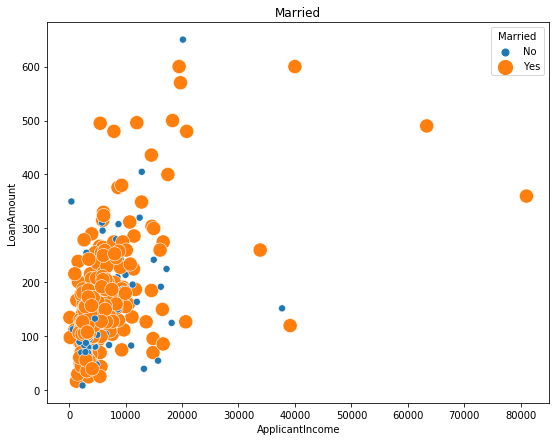

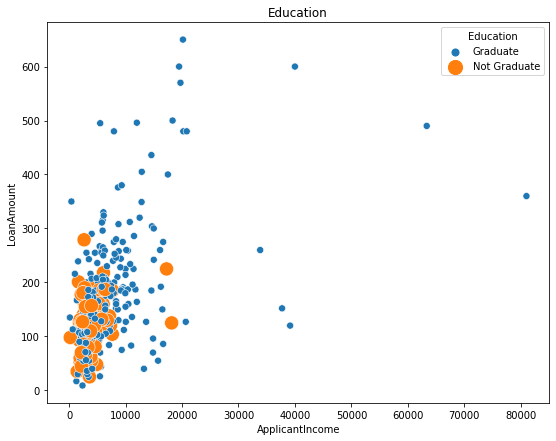

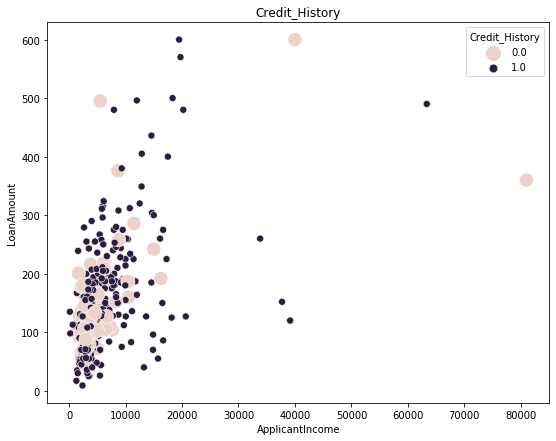

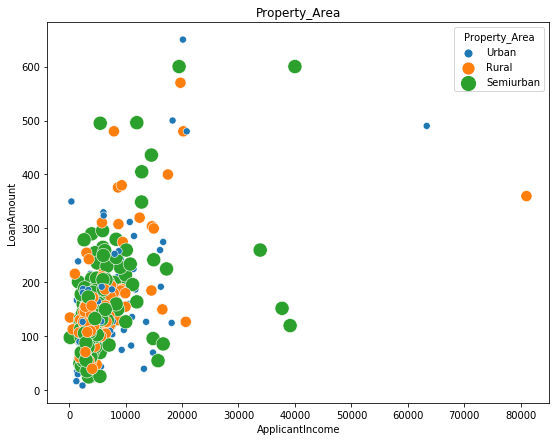

In [8]:
plt.rcParams["figure.figsize"] = (9,7)
for column in binary_columns:
    sns.scatterplot(data=df, x='ApplicantIncome', y='LoanAmount', hue=column, size=column, sizes=(200, 50))
    plt.title(column)
    plt.show()

In [9]:
df.loc[df['Gender'] == "Male", "Gender"] = 0
df.loc[df['Gender'] == "Female", "Gender"] = 1

df.loc[df['Education'] == "Not Graduate", "Education"] = 0
df.loc[df['Education'] == "Graduate", "Education"] = 1

df.loc[df['Loan_Status'] == "N", "Loan_Status"] = 0
df.loc[df['Loan_Status'] == "Y", "Loan_Status"] = 1

In [10]:
df['ApplicantIncome'] = df['ApplicantIncome'].astype(float)

In [11]:
df['ID'] = df.index
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ID
0,LP001002,0,No,0.0,1,No,5849.0,0.0,127.0,360.0,1.0,Urban,1,0
1,LP001003,0,Yes,1.0,1,No,4583.0,1508.0,128.0,360.0,1.0,Rural,0,1
2,LP001005,0,Yes,0.0,1,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,1,2
3,LP001006,0,Yes,0.0,0,No,2583.0,2358.0,120.0,360.0,1.0,Urban,1,3
4,LP001008,0,No,0.0,1,No,6000.0,0.0,141.0,360.0,1.0,Urban,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,No,0.0,1,No,2900.0,0.0,71.0,360.0,1.0,Rural,1,609
610,LP002979,0,Yes,3.0,1,No,4106.0,0.0,40.0,180.0,1.0,Rural,1,610
611,LP002983,0,Yes,1.0,1,No,8072.0,240.0,253.0,360.0,1.0,Urban,1,611
612,LP002984,0,Yes,2.0,1,No,7583.0,0.0,187.0,360.0,1.0,Urban,1,612


In [12]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'ID'],
      dtype='object')

In [13]:
strat_features = ['Gender', 'Education', 'ApplicantIncome', 'LoanAmount']


In [14]:
cat_features = ['Gender', 'Education']
num_features = ['ApplicantIncome', 'LoanAmount']

# Код стратификации

In [15]:
def get_base_stratification(df, df_aa, p_key:str, part):  
    
        
    ERR=0
    flag_group = 0
    mes = ""
    
        
    if(p_key not in df.columns):
        ERR = 1
        mes = "ОШИБКА: В данных не найден столбец содержащий объекты деления!"
        
    elif(len(df.columns)<2):  
        ERR = 2
        mes = "ОШИБКА: Не найдены столбцы с критериями однородности!"
        
    elif(df[p_key].duplicated().any() == True):   
        ERR = 3
        mes = "ОШИБКА: В ключевом столбце найдены дубликаты! Значения должны быть уникальными." 
        

    if(ERR > 0): # Если есть ошибки, то запуск деления не возможен    
        
        print(mes)
        
        return ERR
        
    else:
        
        df = sorting_features(df_res = df, p_key = p_key) # сортируем фичи по типу, чистим данные

        #######
        
        print("Общее количество участников ГС",len(df))
        print("\n")
    
        form_strat_ = form_strat(df, part) # формируем страты
        return form_strat_

In [16]:
# ВЕРХНЕУРОВНЕВЫЙ СКРИПТ

"""
Функция скрипта: верхнеуровневый скрипт, вызывает вспомогательные рабочие скрипты для стратификации, репрезентативного отбора и деления на группы, сохраняет данные.

Входные параметры скрипта:
df - данные, формат – таблица,
part - количество групп, формат – целые числа, в MVP0 значение всегда 2.
p_key – название ключевого столбца, формат - строковый
n – целевое количество участников в выборке, формат - целые числа. 
Если не планируется репрезентативный отбор, то n – это минимальный размер выборки. 
Если репрезентативный отбор планируется, то n, желаемый размер выборки, но он должен быть не меньше минимального размера.
max_num_of_iter – количество попыток найти однородность, формат – числовой, по умолчанию = 1000
alpha – уровень значимости, формат – дробное число, по умолчанию 0.05
representative – флаг репрезентативного отбора, если True, то репрезентативный отбор производится.

На выходе скрипта:

Таблица df_res_all_strat.
+ csv файлы: 

Сохраняется таблица с данными по фичам df_res_all_strat, с именем 'result_all_features.csv'

Сохраняются данные по участникам и группам, под именем 'result.csv'. (При этом остальные столбцы у таблицы df_res_all_strat отбрасываются.)

Сохраняются данные с отчетом о проверке однородности df_report  под именем 'report.csv'.

"""

def true_strat(df, df_aa, p_key:str, n:int, part = 2, max_num_of_iter = 1000, alpha= 0.1, representative = True, name_table='', strat_sample='orig'):  
    
        
    ERR=0
    flag_group = 0
    mes = ""
    
        
    if(p_key not in df.columns):
        ERR = 1
        mes = "ОШИБКА: В данных не найден столбец содержащий объекты деления!"
        
    elif(len(df.columns)<2):  
        ERR = 2
        mes = "ОШИБКА: Не найдены столбцы с критериями однородности!"
        
    elif(df[p_key].duplicated().any() == True):   
        ERR = 3
        mes = "ОШИБКА: В ключевом столбце найдены дубликаты! Значения должны быть уникальными."
        
    elif(len(df)<n):   
        ERR = 4
        mes = "ОШИБКА: В количество участников в таргете меньше, чем целевое количество участников теста."    
        

    if(ERR > 0): # Если есть ошибки, то запуск деления не возможен    
        
        print(mes)
        
        return ERR
        
    else:
        
        df = sorting_features(df_res = df, p_key = p_key) # сортируем фичи по типу, чистим данные

        #######
        
        print("Общее количество участников ГС",len(df), "Репрезентативное количество участников:",n)
        print("\n")
    
        form_strat_ = form_strat(df, part) # формируем страты
         
        small_strats_users = []

        for m in range(max_num_of_iter): 
            print(m)
            
            #print('Итерация:', m+1)
            
            df_res_all_strat = pd.DataFrame()

            for i in form_strat_:    # производим операции над каждой стратой
#                 print("Участники страты",form_strat_[i])
                
                df_strat = df[df[p_key].astype(int).isin(form_strat_[i])]
                
#                 df_strat = df.iloc[form_strat_[i]] # выбор отдельных участников страты 
                
                if df_strat.shape[0] < part:
                    small_strats_users.extend(form_strat_[i])
                    
#                 print(df_strat)
                #df_strat['strat_name'] = i 
            
                if(representative == True): # производим репрезентативный отбор, если он нужен.
                               
                    df_strat = select_prop(df_strat, len(df), n, part)

            
                      
                # делим страту на группы
                df_res = find_group(df_strat, part)
#                 print(df_res.shape)
#                 print(df_res)
    
    
    
                df_res_all_strat = pd.concat([df_res, df_res_all_strat], ignore_index=True) # обеденяем новые данные по всем стратам
            # ключевой столбец назначаем индексом
            
            df_res_all_strat = df_res_all_strat.sort_values(by= p_key, inplace=False)
            df_res_all_strat = df_res_all_strat.astype({p_key: "str"})
            df_res_all_strat = df_res_all_strat.set_index(p_key)
            
            
            
            # убарли юзеров попавших в старты размера < part 
            df_aa = df_aa[~df_aa[p_key].astype(int).isin(small_strats_users)] 
            
            
            # аа-тест
            flag_aa, df_report_aa, df_aa_res = aa_test(df_aa, df_res_all_strat, p_key, part, alpha, representative) 
             
            # проверка однородности      
            flag_checking_uniformity, df_report_test = checking_uniformity(df_res_all_strat,p_group = "group_num",part = part, alpha = alpha)
            #print(df_report_test)  
            
           
            if(flag_checking_uniformity == 1 and len(df_res_all_strat) >= n and flag_aa == 1): #  найдена однородность всех групп

        
                # сохраняем данные по всем фичам
       
                # df_res_all_strat.to_csv(f'result_all_features_{k}.csv', sep=';', encoding='utf-8-sig')
        
        
                # сохраняем данные по группам
        
                df_res_all_strat = df_res_all_strat[['group_num']]
        
                # df_res_all_strat.to_csv(f'result_{name_table}.csv', sep=';', encoding='utf-8-sig')
            
                print("\n","В КГ:",len(df_res_all_strat[(df_res_all_strat["group_num"] == 0)]), "В ЦГ", len(df_res_all_strat[(df_res_all_strat["group_num"] == 1)]))
    
                print("\n")
        
                # сохраняем данные по однородности
        
                # df_report_test.to_csv(f'report_{name_table}.csv', sep=';', encoding='utf-8-sig')
                print("Проверка однородности:",'\n',df_report_test)
                print('\n')
            
                # сохраняем данные по АА-тесту
                
                # df_aa_res.to_csv(f'result_aa_{name_table}.csv', sep=';', encoding='utf-8-sig')
            
                # df_report_aa.to_csv(f'report_aa_{name_table}.csv', sep=';', encoding='utf-8-sig')
            
                print("AA-тест:",'\n',df_report_aa)
        
                return df_res_all_strat
    
        else:
            
            if(m == max_num_of_iter):
                ERR = 5
                mes = "Однородность на найдена! Замените таргет или измените\уменьшите признаки стратификации."            
                print(mes)
                print("AA:",df_report_aa)
                
                return ERR

## Формирование страт

In [17]:
# Формирование страт
"""
Функция скрипта:  формирование страт.

Входящие параметры: 
df – таблица с данными по участникам
part - количество групп, формат – целые числа, в MVP0 значение всегда 2

"""
    
def form_strat(df, part):
    
    features = []
    strat_feature = []
    
    # features_strat = ['CUSTOMER_TYPE : xi2', 'ACC_BALANCE_RUR : ks', 'CHEP : ks', 'SALES : ks','REGISTRATION_DT : ks']
    features_strat = ['Education : xi2', 'ApplicantIncome : ks','LoanAmount : ks']
 # Список фичей по которым будем стратифицировать #Внимание! список с флагами критериев
    
    kombo={}
    strat_kombo = {}
    strat = {}
    
    for i in df.columns:  
        if(i in features_strat):
            if('ks' in i):
                df[i.replace('ks', 'interval')] = interval_combo(df[i]) # формируем интервалы из числовых фичей
                features.append(i.replace('ks', 'interval'))
            else:
                features.append(i)   
# группируем данные
    for i in features:          
        strat_feature.append({i:df.groupby(i).groups})


    for i in strat_feature:
        for k in i:        
        
            iloc={}
        
            kombo[k] = iloc
        
            for j in i[k]:        
            
                iloc[k+"_"+str(j)] = list(i[k][j])


    for q in range(len(features)):
        
        if(q == 0):
            col_unic = kombo[features[q]]
        else: 
            col_unic = strat
    
        if(q+1<len(features)):
            strat = {}
    
            for e in col_unic:
            
                for r in kombo[features[q+1]]:
                    cells_strat = list(set(col_unic[e]) & set(kombo[features[q+1]][r]))
                    

                    
                    #print("Последний столбец:",features[q])
                    if(q == len(features)-2):
                        #print("Последний столбец:",features[q])
                        if(len(cells_strat)>0): # если страта не пустая \ больше или равна кол-ву групп, записываем участников
                            
                            if(len(cells_strat)<part):
                                if("one_strat" not in strat):
                                    strat["one_strat"] = cells_strat
                                else:    
                                    strat["one_strat"].append(cells_strat[0])
                            #elif(len(cells_strat)==3 and part == 2):
                               # strat[(str(e)+"__"+str(r)).replace(" : xi2", "")] = cells_strat[:2]
                               # if("one_strat" not in strat):
                                    #strat["one_strat"] = cells_strat[2]
                                #else:    
                                    #strat["one_strat"].append(cells_strat[2])
                                #print("\n","Три участника страты:", strat[(str(e)+"__"+str(r)).replace(" : xi2", "")], cells_strat[:2])
                      #print("Нормальная страта:", (str(e)+"__"+str(r)).replace(" : xi2", ""))
                            else:
                                strat[(str(e)+"__"+str(r)).replace(" : xi2", "")] = cells_strat
                        
                    else:    
                        
                        strat[(str(e)+"__"+str(r)).replace(" : xi2", "")] = cells_strat
                        
    if(len(strat)==0):
        strat={'one_strat': list(df.index)}
  
    return strat  



## Отбор числа участников из страты

#### Пропорциональное размещение

Общая сумма участников всех страт - Все участники ГС - находим долю конкретной страты. 

Смотрим, сколько участников теста нам нужно. От этого нового количества n вычисляем n_h то вычисленной доле.

#### Алгорит нахождения кол-ва участников в страте и вычитания из нее необходимого числа.

Правила и исключения

* Страта очень маленькая - ее нужно присоеденить 
* При округлении кол-ва участников страты общиее количество участников теста получилось меньше, чем заявленное из-за погрешности округления - придумать правило 

### Формирование интервалов для числовых фичей

### Метод процентилей

In [18]:
"""
Функция скрипта:  формирование интервалов в числовой фиче.

Входные параметры скрипта:
s – отдельная фича, столбец

На выходе скрипта:

s_percentile, столбец содержащий интервалы для фичи, которая загружалась при вызове скрипта. 

"""

def interval_combo(s):
    
    s_percentile = pd.Series(list(s.values), index=list(s.index)) 
    
    p = [0.5, 0.25, 0.05] 
    
    for i in p:
        s_percentile[list(s[(s<s.quantile(q=i))].index)] = i
        s_percentile[list(s[(s>=s.quantile(q=1.0-i))].index)] = i
        
    s_percentile[list(s[(s == 0)].index)] = 0 # ноль выделяем в отдельный интервал 
    s_percentile[list(s[(s < 0)].index)] = -1 # минусовые значения выделяем в отдельный интервал - т.к. убытки
     
            
    return s_percentile


## Сводный скрипт стратификации

In [19]:
"""
Функция скрипта:  сортировка фичей по критериям + чистка данных в фичах.

Входящие параметры: 
df_res – таблица с данными участников
p_key -  p_key – название ключевого столбца (содержит объекты деления), формат – строковый, 
значение берется из входного параметра p_key скрипта, который вызывает скрипт sorting_features

flag_aa = False - флаг АА-теста, выбор будет ли проводиться АА-тест или стандартная проверка на однородность.

"""

def sorting_features(df_res, p_key:str, flag_aa = False): # сортировка фичей по критериям + чистка данных в фичах
    
    features_ks = ['ApplicantIncome', 'LoanAmount']
    features_xi2 = ['Education']
    features_case = []
    
    
    # фичи на хи2
#     features_xi2 = ["REVOLVING_CREDIT_FLG","INVESTMENT_CREDIT_FLG","OVERDRAFT_CREDIT_FLG","LETTER_OF_CREDIT_FLG",
#                 "SALARY_PROJECT_FLG","TRADE_ACQUIRING_FLG","INTERNET_ACQUIRING_FLG","OKVED_CD","CRM_SEGMENT_TYPE_NM",
#                 "CRM_CA_TB_NM","OKFS_CD","CUSTOMER_TYPE","CRM_MACRO_INDUSTRY_TYPE_NM", "PRIOTIZER_FLG"]

#     # фичи на Колмогоров-Смирнов
#     features_ks = ["WORKERS_AMOUNT_FNS","DEBT_DUE_RUB","ACC_TURN_DEBIT_90_RUR","ACC_TURN_CREDIT_90_RUR","ACC_BALANCE_RUR",
#                 "CLIENT_CNT_DAYS","CHEP","SUBGROUP","Score"] 

#     # фичи от 7 уникальных значений Колмогоров-Смирнов, менее Хи2
#     features_case = ["REVOLVING_CREDIT_CNT","INVESTMENT_CREDIT_CNT","OVERDRAFT_CREDIT_CNT","LETTER_OF_CREDIT_CNT",
#                  "SALARY_PROJECT_CNT","TRADE_ACQUIRING_CNT","INTERNET_ACQUIRING_CNT","TOTAL_CNT"]

    list_kriterii=[]

    for i in df_res.columns:  
        
        #print(i,'тип фичи', df_res[i].dtype)
        
        if((i == p_key) or (i == 'group_num') or ("ks" in i) or ("xi2" in i) or ("interval" in i) or ("tt" in i)):
            list_kriterii.append(i)
            
        else:
                    
            if(i in features_xi2):
                #print("Хи2 1", i)
                list_kriterii.append(i+" : xi2")
                
            elif(i in features_ks and (df_res[i].dtype == np.float64 or df_res[i].dtype == np.int64) and flag_aa == False):
                #print("ks", i)
                list_kriterii.append(i+" : ks")
            
            elif(df_res[i].dtype != np.float64 and df_res[i].dtype != np.int64):
                #print("Нужна чистка", i)
                
                # чистка данных в  фиче
                df_res[i] = df_res[i].replace({'null':np.nan, 'Null':np.nan,'NULL':np.nan,'nan':np.nan,'Nan':np.nan,'NaN':np.nan,'NAN':np.nan,'-':np.nan, '':np.nan, ' ':np.nan})          
                
                try:
                    # перевод фичи в числовой формат
                    df_res = df_res.astype({i: "float64"})
                except:  
                    if(i in features_ks or i in features_case):
                        print("Ошибка при переводе в числовой формат фичи:", i, " Данные в фиче не относятся к числовым, требуется замена данных.")
                         
            # анализ данных в фиче, после чистки данных
            
            if(i +" : ks" not in list_kriterii and i+" : xi2" not in list_kriterii and i+" : tt" not in list_kriterii): 
                if(flag_aa == True and (df_res[i].dtype == np.float64 or df_res[i].dtype == np.int64)):
                    list_kriterii.append(i+" : tt")
                
                elif(df_res[i].nunique()>7 and (df_res[i].dtype == np.float64 or df_res[i].dtype == np.int64)):
                        #print("KS", i)                
                        list_kriterii.append(i+" : ks")
                    
                else:
                    #print("Хи2 2", i)
                    list_kriterii.append(i+" : xi2")
                    
           
                
        #print(i, list_kriterii)            
    #print(df_res.dtypes)
    #print(list_kriterii, len(list_kriterii))
    df_res.columns = list_kriterii                
    return df_res

# загружаем данные
#df=pd.read_excel('HOMOG_COLS_DOCDOC_1606.xlsx',dtype={'INN':str})
#df = df[['INN','CUSTOMER_TYPE', 'ACC_BALANCE_RUR', 'CHEP', 'REGISTRATION_DT', 'CRM_MACRO_INDUSTRY_TYPE_NM']]
#sorting_features(df, 'INN', True)

### Проверка однородности - получаем p-value

In [20]:
# скрипт хи2

def ser_conjugacy(ser, index):
    zero=[]        
    index_plus = list(set(index) - set(ser.index.tolist()))
 
    for i in range (len(index_plus)):
        zero.append(0)
    
    return pd.concat([ser, pd.Series(zero, index=index_plus)]) 

"""
Функция скрипта: Построение таблицы сопряженности с учетом малонаполненных подгрупп, проведение стат. теста Хи2.

Входящие параметры: 
gr_A - данные участников по столбцу от одной группы
gr_B - данные участников по столбцу от другой группы


"""

def check_homo_cat_xi2_other(gr_A,gr_B): 
    nonhomo={}
    other={}
    count=0

    # строим таблицу сопряженности
    gr_B=gr_B.groupby(gr_B).count()
    gr_A=gr_A.groupby(gr_A).count()
    index_= pd.Series(gr_B.index.tolist()+gr_A.index.tolist())
    index_= index_.groupby(index_).count().index.tolist()
    
    gr_B = ser_conjugacy(gr_B, index_)
    gr_A = ser_conjugacy(gr_A, index_)    
   
    merge_data=pd.DataFrame()
    merge_data['id_x']=gr_A
    merge_data['id_y']=gr_B
    merge_data=merge_data.fillna(0)     # заполнение пропусков нулями
   
    # Обрабатывем малонаполненные группы
    count_sub_gr=(merge_data['id_x']+merge_data['id_y']).sort_values()    
    
    
    # если есть малонаполненные подгруппы, то объединяем их
    for i in count_sub_gr.index:   
           
        if((count_sub_gr.loc[i]<=15) or (count==1)):
            
            if(count==0):                                          
                other = {'id_x': merge_data['id_x'].loc[i],'id_y':merge_data['id_y'].loc[i]}   
                
            else:  
                other = {'id_x': merge_data['id_x'].loc[i]+other['id_x'],'id_y':merge_data['id_y'].loc[i]+other['id_y']}  
            
            count+=1
            merge_data.drop(labels = [i],axis = 0, inplace = True)                
            
            
    if(len(other)>0):                
            merge_data = pd.concat([merge_data, pd.DataFrame([other],index =['Прочее'])]) # , ignore_index=True
    #print("\n")  
    
          
    pvalue = chi2_contingency(merge_data[["id_x","id_y"]])[1]    
        
    #print('p-value:', round(pvalue,5))    
    if (str(pvalue)=='nan'):       
        
        pvalue = 0
        
    
    return pvalue


In [21]:
# Тест Колмогорова-Смирнова

"""
Функция скрипта: Проведение стат. теста Колмогорова-Смирнова.

Входящие параметры: 
gr_A - данные участников по столбцу от одной группы
gr_B - данные участников по столбцу от другой группы
alpha  –  уровень значимости, формат – дробное число, значение берется из входного параметра alpha  скрипта, который вызывает  скрипт ks_test

"""
def ks_test(gr_A,gr_B,alpha):
    ks_test=ks_2samp(gr_A,gr_B)[1]
    #if(ks_test<alpha):
        #print("Колмогоров-Смирнов, НЕ однородны: р=",ks_test)    
    #else:
        #print("Колмогоров-Смирнов, однородны: р=",ks_test) 
    
    return ks_test
    


In [22]:
"""
Функция скрипта: проверка однородности, формирования отчета по фичам
Входящие параметры: 

•	df_res – таблица сформированная скриптами random_strat или multy_group•	
•	alpha  –  уровень значимости, формат – дробное число, значение берется из входного параметра alpha  скрипта, который вызывает  скрипт checking_uniformity
•	p_group - название столбца с указанием принадлежности к группе таблицы df_res, формат - строковый, если скрипт вызывается скрипами random_strat или multy_group, значение «».
•	part -  количество групп, формат – целые числа, значение берется из входного параметра part скрипта, который вызывает скрипт checking_uniformity
"""

def checking_uniformity(df_res, p_group:str, part, alpha):
    flag_group=0      

    
    df_report = pd.DataFrame()    
    df_report_new  = pd.DataFrame()
    
    
    for i in df_res.columns:   
                        
        if('Unnamed' in i):                
            df_res.drop(i, axis=1, inplace=True)
            
        elif(('xi2' in i) or ('ks' in i) or ('tt' in i)):
                        
            
#####################################################################################################3                        
               
                        # проверка на две группы  
            if(part==2):
                #print("две группы")
                        
                gr_A=df_res[(df_res["group_num"] == 0 )][i] 
                gr_B=df_res[(df_res["group_num"] == 1 )][i]                         
                        
                    # если распределение биноминальное или категориальное - отправляем на хи2, кат - не более 7 уникальзых значений. 
                
                
                
                if('xi2' in i):
                            
                    #print("бином или категория", i, df_res[i].dtypes)  #фича на хи2                    
                    p_value = check_homo_cat_xi2_other(gr_A,gr_B)
                    #res=[i,p_value,alpha] 
                    
                        #break  
                            
                            
                elif('ks' in i):     
                    # числовые отправляются на критерий Колмогорова-Смирнова
                    #print("колмогоров", i, df_res[i].dtypes)  
                    
                    p_value = ks_test(gr_A,gr_B,alpha) 
                    #res=[i,p_value,alpha] 
                     # Заполняем данными по итерации датафрейм сплитовалки  
                elif('tt' in i):   
                    
                    p_value = t_test(gr_A,gr_B, alpha)
                    
                        #break #если однородность не найдена на одной из колонок, следующие не проверяются, переход к следующей итерации
            # если нет однородности
                
                if(p_value < alpha):                        
                    flag = 0  
                else:
                    flag = 1
                    
            df_report_new = pd.DataFrame({'features':i, 'p-value':p_value, 'alpha':alpha, 'flag':flag},index = [0])
        
            df_report = pd.concat([df_report, df_report_new], ignore_index=True)
                        
    
    if(df_report['flag'].nunique()==1 and df_report['flag'].unique()==1):
        flag_group = 1 
    #print("Флаг однородности:", flag_group)
    
    # flag_group = 1, значит однородно
    return flag_group, df_report 
 

### Отбор и деление

In [23]:
# деление на группы

"""
Функция скрипта: деление на группы 

Входящие параметры: 
df - данные по участникам страты, формат – таблица,
part - количество групп, формат – целые числа.

"""
def find_group(df,part:int):        
    
    df_new = pd.DataFrame()
    df_res = pd.DataFrame()
    
    if(len(df)>0):
        n_h = len(df)
        df.reset_index(drop=True, inplace=True) # сбрасываем индексы
        n_h_group = round(n_h/part)
        
        if(n_h_group > 0):
            for i in range(part):          
            
                if(i!=(part-1)): 
                
                                   
                        df_new=df.sample(n=n_h_group)             
                        df=df[~df.index.isin(df_new.index)]  
            
                else:    
                    df_new=df
            
        
                df_new['group_num']=i    
                df_res = pd.concat([df_res, df_new], ignore_index=True) #
        
        
    return df_res   

In [24]:
"""
Функция скрипта: При репрезентативном отборе пропорционально вычисляет размер страты для тестовой выборки.

Входящие параметры: 
df_strat – данные по участникам страты, формат – таблица
n_gs – количество участников в ГС, формат - целые числа
n – количество участников в выборке, формат - целые числа
part - количество групп, формат – целые числа, в MVP0 значение всегда 2.

"""

def select_prop(df_strat, n_gs:int, n:int, part:int):
    
    per_strat = len(df_strat)/n_gs # находим процент, занимаемый стратой в ГС
        
    
    n_h =  round(n*per_strat) 
    if(n_h > 0 and n_h < part):
        n_h = part # отрез участников для малых страт    
        
    if(part == 2 and n_h==3):
        n_h = 2
        
       # рандомно выбераем из страты нужное кол-во участников в выборку
    if(n_h > 0):       
        df_strat = df_strat.sample(n=n_h) 
    else:
        df_strat = pd.DataFrame()

        
    return df_strat
 

In [25]:
"""
Входные параметры скрипта:
gr_A - данные участников по столбцу от одной группы
gr_B - данные участников по столбцу от другой группы
alpha  –  уровень значимости, формат – дробное число, значение берется из входного параметра alpha  скрипта, который вызывает  скрипт ks_test

"""

def t_test(gr_A,gr_B, alpha):
    
    # t-тест с разными дисперсиями модификация Уэлша
    stat, p_value = ttest_ind(gr_A, gr_B, equal_var=False)[:2]  
    #if(p_value<alpha):
        #print("t-test, НЕ однородны: р=",ks_test)    
    #else:
        #print("t-test, однородны: р=",ks_test) 
    return  p_value 
    

In [26]:
"""
Входные параметры скрипта:
df_aa - данные включающие ключевой столбец идентичный таблице df и фичи для проведения АА-теста, формат – таблица;
df – данные включающие ключевой столбец и фичи с признаками однородности, формат – таблица;
part - количество групп, формат – целые числа, в MVP0 значение всегда 2.
p_key – название ключевого столбца, формат - строковый
alpha – уровень значимости, формат – дробное число, по умолчанию 0.05
representative – флаг репрезентативного отбора, если True, то репрезентативный отбор производится.

"""

def aa_test(df_aa, df, p_key:str ,part:int, alpha:float, representative:bool):
    
    #print('Колонки датасета АА -аа',df_aa.columns)
    
    df = df[['group_num']]
    df_aa = df_aa.sort_values(by = p_key, inplace=False)  
    df_aa = df_aa.astype({p_key: "str"})
    df_aa = df_aa.set_index(p_key)
        
    # Если есть репрезентативный отбор
    if(representative == True):
   
        df_aa=df_aa[df_aa.index.isin(df.index)] 
    #
    df_aa["group_num"] = df["group_num"].values
    
    # чистим данные
    df_aa = sorting_features(df_aa, p_key, True)
    
    
    # проверка однородности      
    flag_aa, df_report_test_aa = checking_uniformity(df_aa, p_group = "group_num", part = part, alpha = alpha)
   
    #print('df',"\n", df.head())
    #print("\n")
    #print('df_aa',"\n",df_aa.head())
    #print("\n")  
    if(len(df) == len(df_aa)):
        
        return flag_aa, df_report_test_aa, df_aa
    

## Тестовые примеры

**Входные параметры скрипта:**

df - данные, формат – таблица,
part - количество групп, формат – целые числа, в MVP0 значение всегда 2.
p_key – название ключевого столбца, формат - строковый
max_num_of_iter – количество попыток найти однородность, формат – числовой, по умолчанию = 100
alpha – уровень значимости, формат – дробное число, по умолчанию 0.05
representative – флаг репрезентативного отбора, если True, то репрезентативный отбор производится.

**На выходе скрипта:**


Таблица df_res_all_strat.

+ csv файлы:

'result_all_features.csv' - с данными по фичам.

'result.csv' - данные по участникам и группам.

'report.csv' - данные с отчетом о проверке однородности 


### Синтетический датасет

In [33]:
# Генерация датасета.

assists = []
position = []
team = []
inn = []



assists_base = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
position_base = ['G', 'G', 'F', 'G', 'F', 'F', 'C', 'C']
team_base = ['A', 'A', 'B', 'B', 'B', 'B', 'B', 'B']

n = 2000

for i in range(n):
    assists.append(random.choice(assists_base))
    position.append(random.choice(position_base))
    team.append(random.choice(team_base))
    inn.append(i)
    
    
    
df = pd.DataFrame({"inn":inn,"assists":assists, "position":position, "team":team})


# вызов скрипта стратификации

true_strat(df, df, p_key="inn", n=1000, part = 2, alpha= 0.1, representative = True)  

Общее количество участников ГС 2000 Репрезентативное количество участников: 1000



 В КГ: 500 В ЦГ 500


Проверка однородности: 
          features   p-value  alpha  flag
0    assists : ks  0.819151    0.1     1
1  position : xi2  0.989498    0.1     1
2      team : xi2  0.515385    0.1     1


AA-тест: 
          features   p-value  alpha  flag
0    assists : ks  0.819151    0.1     1
1  position : xi2  0.989498    0.1     1
2      team : xi2  0.515385    0.1     1


,group_num
inn,
4,1
6,1
10,0
11,0
13,0
...,...
1989,1
1995,0
1996,1


In [442]:
# вызов скрипта стратификации

true_strat(df, df, p_key="inn", n=1000, part = 2, alpha= 0.1, representative = True)  

Общее количество участников ГС 2000 Репрезентативное количество участников: 1000



 В КГ: 500 В ЦГ 500


Проверка однородности: 
    alpha        features  flag   p-value
0    0.1    assists : ks     1  0.811041
1    0.1  position : xi2     1  0.923901
2    0.1      team : xi2     1  0.342424


AA-тест: 
    alpha        features  flag   p-value
0    0.1    assists : ks     1  0.811041
1    0.1  position : xi2     1  0.923901
2    0.1      team : xi2     1  0.342424


,group_num
inn,
0,0
1,0
2,0
3,0
4,0
9,0
10,1
12,0
14,1


Отобрано и поделено на синтетике успешно!

### Тестирование на реальных данных

In [443]:
# загружаем данные
df_orig=pd.read_excel('HOMOG_COLS_DOCDOC_1606.xlsx',dtype={'INN':str})
df_orig.head()


,INN,REVOLVING_CREDIT_FLG,INVESTMENT_CREDIT_FLG,OVERDRAFT_CREDIT_FLG,LETTER_OF_CREDIT_FLG,SALARY_PROJECT_FLG,TRADE_ACQUIRING_FLG,INTERNET_ACQUIRING_FLG,REVOLVING_CREDIT_CNT,INVESTMENT_CREDIT_CNT,...,OKVED_CD,CRM_SEGMENT_TYPE_NM,CRM_CA_TB_NM,OKFS_CD,CUSTOMER_TYPE,TOTAL_CNT,CRM_MACRO_INDUSTRY_TYPE_NM,SUBGROUP,REGISTRATION_DT,PRIOTIZER_FLG
0,1,0,0,0,0,1,1,0,0,0,...,10,Средние,Юго-Западный банк,10,Юр. лицо,13,Пищевая промышленность,1,7976,0
1,2,0,0,0,0,1,0,0,0,0,...,10,Средние,Юго-Западный банк,10,Юр. лицо,11,Пищевая промышленность,1,5285,0
2,3,0,0,0,0,1,0,0,0,0,...,81,Средние,Юго-Западный банк,10,ИП,6,Связь и телекоммуникации,1,3769,0
3,4,0,0,1,1,0,0,0,0,0,...,45,Средние,Юго-Западный банк,10,Юр. лицо,7,Сельское хозяйство,1,6269,0
4,5,0,0,0,0,0,0,0,0,0,...,68,Крупные,Юго-Западный банк,10,Юр. лицо,8,Операции с недвижимым имуществом,1,4168,0


In [424]:
df_orig.columns

Index(['INN', 'REVOLVING_CREDIT_FLG', 'INVESTMENT_CREDIT_FLG',
       'OVERDRAFT_CREDIT_FLG', 'LETTER_OF_CREDIT_FLG', 'SALARY_PROJECT_FLG',
       'TRADE_ACQUIRING_FLG', 'INTERNET_ACQUIRING_FLG', 'REVOLVING_CREDIT_CNT',
       'INVESTMENT_CREDIT_CNT', 'OVERDRAFT_CREDIT_CNT', 'LETTER_OF_CREDIT_CNT',
       'SALARY_PROJECT_CNT', 'TRADE_ACQUIRING_CNT', 'INTERNET_ACQUIRING_CNT',
       'WORKERS_AMOUNT_FNS', 'DEBT_DUE_RUB', 'ACC_TURN_DEBIT_90_RUR',
       'ACC_TURN_CREDIT_90_RUR', 'ACC_BALANCE_RUR', 'CLIENT_CNT_DAYS', 'CHEP',
       'OKVED_CD', 'CRM_SEGMENT_TYPE_NM', 'CRM_CA_TB_NM', 'OKFS_CD',
       'CUSTOMER_TYPE', 'TOTAL_CNT', 'CRM_MACRO_INDUSTRY_TYPE_NM', 'SUBGROUP',
       'REGISTRATION_DT', 'PRIOTIZER_FLG'],
      dtype='object')

In [444]:
df = df_orig[['INN','CUSTOMER_TYPE', 'ACC_BALANCE_RUR', 'CHEP', 'REGISTRATION_DT', 'CRM_MACRO_INDUSTRY_TYPE_NM']]
df_aa = df_orig[['INN','TOTAL_CNT','INVESTMENT_CREDIT_CNT']]

In [445]:
# без репрезентативного отбора - просто делим страты


true_strat(df, df_aa, p_key="INN", n=1000, part = 2, alpha= 0.1, representative = False)

Общее количество участников ГС 3500 Репрезентативное количество участников: 1000



 В КГ: 1751 В ЦГ 1749


Проверка однородности: 
    alpha                          features  flag   p-value
0    0.1               CUSTOMER_TYPE : xi2     1  0.991081
1    0.1              ACC_BALANCE_RUR : ks     1  0.874662
2    0.1                         CHEP : ks     1  0.833719
3    0.1              REGISTRATION_DT : ks     1  0.404530
4    0.1  CRM_MACRO_INDUSTRY_TYPE_NM : xi2     1  0.364595


AA-тест: 
    alpha                    features  flag   p-value
0    0.1              TOTAL_CNT : tt     1  0.863220
1    0.1  INVESTMENT_CREDIT_CNT : tt     1  0.207493


,group_num
INN,
1,0
10,1
100,1
1000,0
1001,0
1002,0
1003,1
1004,1
1005,1


In [446]:
# c репрезентативным отбором - просто делим страты

true_strat(df, df_aa, p_key="INN", n=1000, part = 2, alpha= 0.1, representative = True)

Общее количество участников ГС 3500 Репрезентативное количество участников: 1000



 В КГ: 509 В ЦГ 506


Проверка однородности: 
    alpha                          features  flag   p-value
0    0.1               CUSTOMER_TYPE : xi2     1  0.943812
1    0.1              ACC_BALANCE_RUR : ks     1  0.455853
2    0.1                         CHEP : ks     1  0.940795
3    0.1              REGISTRATION_DT : ks     1  0.992266
4    0.1  CRM_MACRO_INDUSTRY_TYPE_NM : xi2     1  0.698360


AA-тест: 
    alpha                    features  flag   p-value
0    0.1              TOTAL_CNT : tt     1  0.694585
1    0.1  INVESTMENT_CREDIT_CNT : tt     1  0.563561


,group_num
INN,
1002,1
1003,0
1004,0
1008,1
1012,1
1013,0
1022,1
1023,0
1035,0


Отобрано и поделено на реальных данных успешно!

# Генетический алгоритм

In [27]:
# без репрезентативного отбора - просто делим страты
df_inp = df[['ID'] + strat_features]#.loc[5:15]
df_aa = df[['ID', 'Loan_Status']]#.loc[5:15]

In [28]:
df_inp

,ID,Gender,Education,ApplicantIncome,LoanAmount
0,0,0,1,5849.0,127.0
1,1,0,1,4583.0,128.0
2,2,0,1,3000.0,66.0
3,3,0,0,2583.0,120.0
4,4,0,1,6000.0,141.0
...,...,...,...,...,...
609,609,1,1,2900.0,71.0
610,610,0,1,4106.0,40.0
611,611,0,1,8072.0,253.0
612,612,0,1,7583.0,187.0


In [29]:
min_sample_in_group = 2
atomic_strats = get_base_stratification(df_inp, df_aa, p_key="ID", part=min_sample_in_group)  

Общее количество участников ГС 601




In [30]:
atomic_strats

{'one_strat': [28],
 'Education_0__ApplicantIncome : interval_0.05__LoanAmount : interval_0.25': [160,
  71,
  170,
  300,
  493,
  468,
  250],
 'Education_0__ApplicantIncome : interval_0.05__LoanAmount : interval_0.5': [338,
  534],
 'Education_0__ApplicantIncome : interval_0.25__LoanAmount : interval_0.05': [520,
  403],
 'Education_0__ApplicantIncome : interval_0.25__LoanAmount : interval_0.25': [6,
  528,
  401,
  407,
  412,
  414,
  421,
  553,
  429,
  309,
  573,
  62,
  449,
  451,
  200,
  587,
  596,
  340,
  490,
  109,
  253],
 'Education_0__ApplicantIncome : interval_0.25__LoanAmount : interval_0.5': [256,
  386,
  3,
  393,
  529,
  20,
  22,
  535,
  406,
  153,
  413,
  543,
  551,
  301,
  305,
  50,
  563,
  179,
  439,
  192,
  450,
  68,
  197,
  471,
  605,
  485,
  107,
  365,
  496,
  241,
  247,
  252],
 'Education_0__ApplicantIncome : interval_0.5__LoanAmount : interval_0.05': [400,
  94,
  190,
  207],
 'Education_0__ApplicantIncome : interval_0.5__LoanAmoun

In [31]:
# Подсчитываем какую дисперсию мы получаем при базовом разбиении и сэмплирвоании с учетом дисперсии, хотим, чтобы в генетическом алгоритме дисперсия стала меньше

def sample_strata_sizes_(df, strata_dict, p_key, target_df, n):
    stds = []
    sizes = []
    
    for i in strata_dict:
        df_strat = df[df[p_key].astype(int).isin(strata_dict[i])]
        # print(df_strat.ID, '\n')
        y = target_df.loc[target_df[p_key].isin(df_strat[p_key]), 'Loan_Status']
        stds.append(y.values.std())
        sizes.append(y.shape[0])

    sizes =  np.array(sizes)
    stds = np.array(stds)
    n_h = (sizes * stds * n) / np.sum(stds * sizes)

    return n_h

def sample_from_strata_(df_strat, n_gs, n, n_h=None):
    if n_h is None:
        # simple sampling (proportional)
        per_strat = len(df_strat) / n_gs
        n_h = round(n * per_strat)

    if(n_h > 0):       
        df_strat = df_strat.sample(n=n_h)
        # print(df_strat.ID, '\n')
    else:
        df_strat = pd.DataFrame()

        
    return df_strat


def calc_stratified_var_(df, target_df, weights, p_key='ID'):
    var = 0
    for group in df.groupby(by=['strat'], sort=False):

        ids = group[1][p_key].values
        # print(ids)
        N = weight * len(df_inp)
        
        weight = weights[group[0]]
        if len(target_df.loc[target_df[p_key].isin(ids), 'Loan_Status'].values) > 1:
            var += weight * target_df.loc[target_df[p_key].isin(ids), 'Loan_Status'].values.var(ddof=1)
        # print(var)
        
    return var


n = 30 #TODO: это поменять!

weights = {}              
for strata in atomic_strats:
    weights[strata] = len(atomic_strats[strata]) / df_inp.shape[0]


n_h = sample_strata_sizes_(df_inp, atomic_strats, "ID", df_aa, n)
n_h = np.round(n_h).astype(int)
print(n_h)

df_res_all_strat_std = pd.DataFrame()
j = 0

stratified_var_ = 0
for i in atomic_strats:    # производим операции над каждой стратой
    df_strat = df[df["ID"].astype(int).isin(atomic_strats[i])]
    # df_strat['strat'] = i
    N = df_strat.shape[0]
    
    var = df_aa.loc[df_aa.ID.isin(df_strat.ID), "Loan_Status"].values.var(ddof=1)
    if n_h[j] > 0:
        stratified_var_ += N ** 2 * (1 - n_h[j] / N) * ( var / n_h[j])


    
    # df_strat_std = sample_from_strata_(df_strat, len(df), n, n_h=n_h[j])

    # df_res_all_strat_std = pd.concat([df_strat_std, df_res_all_strat_std], ignore_index=True) # обеденяем новые данные по всем стратам
    j += 1


# V_min = calc_stratified_var_(df_res_all_strat_std, df_aa.loc[df_aa.ID.isin(df_res_all_strat_std['ID'])], p_key='ID', weights=weights)

stratified_var_


[0 0 0 0 1 2 0 1 2 1 1 1 1 4 4 1 4 7]


2339.6724521707797

In [32]:
V_min = stratified_var_
V_min

2339.6724521707797

In [33]:
atomic_strats_keys = list(atomic_strats.keys())
atomic_strats_keys

['one_strat',
 'Education_0__ApplicantIncome : interval_0.05__LoanAmount : interval_0.25',
 'Education_0__ApplicantIncome : interval_0.05__LoanAmount : interval_0.5',
 'Education_0__ApplicantIncome : interval_0.25__LoanAmount : interval_0.05',
 'Education_0__ApplicantIncome : interval_0.25__LoanAmount : interval_0.25',
 'Education_0__ApplicantIncome : interval_0.25__LoanAmount : interval_0.5',
 'Education_0__ApplicantIncome : interval_0.5__LoanAmount : interval_0.05',
 'Education_0__ApplicantIncome : interval_0.5__LoanAmount : interval_0.25',
 'Education_0__ApplicantIncome : interval_0.5__LoanAmount : interval_0.5',
 'Education_1__ApplicantIncome : interval_0.05__LoanAmount : interval_0.05',
 'Education_1__ApplicantIncome : interval_0.05__LoanAmount : interval_0.25',
 'Education_1__ApplicantIncome : interval_0.05__LoanAmount : interval_0.5',
 'Education_1__ApplicantIncome : interval_0.25__LoanAmount : interval_0.05',
 'Education_1__ApplicantIncome : interval_0.25__LoanAmount : interval

In [34]:
atomic_strats_ind = list(range(len(atomic_strats_keys)))

atomic_strats_ind

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [35]:
atomic_strata_by_ind = dict(zip(atomic_strats_ind, list(atomic_strats.values())))
atomic_strata_by_ind

{0: [28],
 1: [160, 71, 170, 300, 493, 468, 250],
 2: [338, 534],
 3: [520, 403],
 4: [6,
  528,
  401,
  407,
  412,
  414,
  421,
  553,
  429,
  309,
  573,
  62,
  449,
  451,
  200,
  587,
  596,
  340,
  490,
  109,
  253],
 5: [256,
  386,
  3,
  393,
  529,
  20,
  22,
  535,
  406,
  153,
  413,
  543,
  551,
  301,
  305,
  50,
  563,
  179,
  439,
  192,
  450,
  68,
  197,
  471,
  605,
  485,
  107,
  365,
  496,
  241,
  247,
  252],
 6: [400, 94, 190, 207],
 7: [546, 519, 73, 426, 491, 44, 172, 174, 124, 466, 538, 86, 343, 410, 92],
 8: [259,
  387,
  517,
  139,
  398,
  527,
  16,
  18,
  279,
  280,
  27,
  544,
  39,
  560,
  565,
  311,
  442,
  59,
  315,
  446,
  66,
  322,
  202,
  203,
  204,
  205,
  79,
  463,
  595,
  213,
  342,
  215,
  601,
  346,
  347,
  607,
  480,
  481,
  98,
  226,
  100,
  358,
  232,
  492,
  112,
  244,
  503,
  504,
  510],
 9: [130,
  258,
  525,
  14,
  147,
  278,
  409,
  283,
  155,
  41,
  561,
  308,
  324,
  333,
  600,
 

In [36]:
p_key = 'ID'
target_column = 'Loan_Status'

variances = []
means = []

for key in atomic_strats_keys:
    data = df[df[p_key].astype(int).isin(atomic_strats[key])]
    if len(data) <= 1:
        variances.append(0.0)
    else:
        variances.append(data[target_column].values.var(ddof=1))
    means.append(data[target_column].values.mean())

In [37]:
atomic_strata_by_ind

{0: [28],
 1: [160, 71, 170, 300, 493, 468, 250],
 2: [338, 534],
 3: [520, 403],
 4: [6,
  528,
  401,
  407,
  412,
  414,
  421,
  553,
  429,
  309,
  573,
  62,
  449,
  451,
  200,
  587,
  596,
  340,
  490,
  109,
  253],
 5: [256,
  386,
  3,
  393,
  529,
  20,
  22,
  535,
  406,
  153,
  413,
  543,
  551,
  301,
  305,
  50,
  563,
  179,
  439,
  192,
  450,
  68,
  197,
  471,
  605,
  485,
  107,
  365,
  496,
  241,
  247,
  252],
 6: [400, 94, 190, 207],
 7: [546, 519, 73, 426, 491, 44, 172, 174, 124, 466, 538, 86, 343, 410, 92],
 8: [259,
  387,
  517,
  139,
  398,
  527,
  16,
  18,
  279,
  280,
  27,
  544,
  39,
  560,
  565,
  311,
  442,
  59,
  315,
  446,
  66,
  322,
  202,
  203,
  204,
  205,
  79,
  463,
  595,
  213,
  342,
  215,
  601,
  346,
  347,
  607,
  480,
  481,
  98,
  226,
  100,
  358,
  232,
  492,
  112,
  244,
  503,
  504,
  510],
 9: [130,
  258,
  525,
  14,
  147,
  278,
  409,
  283,
  155,
  41,
  561,
  308,
  324,
  333,
  600,
 

In [38]:
var_dict = dict(zip(atomic_strats_ind, variances))
mean_dict = dict(zip(atomic_strats_ind, means))

In [39]:
P_KEY = 'ID'
TARGET_COLUMN = 'Loan_Status'
TOTAL_SIZE = df_inp.shape[0]
# K = len(atomic_strata_by_ind.keys())


def stratified_var():
    pass
    

def join_vars_sizes(atomic_strats_numbers):
    new_mean = join_means(atomic_strats_numbers)
    var = 0
    total_size = 0
    for i in atomic_strats_numbers:
        size = len(atomic_strata_by_ind[i])
        total_size += size


        var += (size - 1) * var_dict[i] + size * (mean_dict[i] - new_mean) ** 2

    if total_size <= 1:
        return 0.0, total_size

    return var / (total_size - 1), total_size



def join_vars_simple(atomic_strats_numbers):
    joint_target = []
    #atomic_strats_numbers - список с названиями атомарных страт, что вошли в объединение
    for i in atomic_strats_numbers:
        indexes = atomic_strata_by_ind[i]
        data = df[df[P_KEY].isin(indexes)][TARGET_COLUMN]
        joint_target.extend(data.values)

    if len(joint_target) <= 1:
        return 0.0
    return np.var(joint_target, ddof=1)

def join_means(atomic_strats_numbers):
    mean = 0 
    total_size = 0
    for i in atomic_strats_numbers:
        size = len(atomic_strata_by_ind[i])
        total_size += size
        mean += (mean_dict[i] * size)
    return mean / total_size


def minimize_var_solution(all_strats, n):
    """
    strats - list[list] -- лист с элементами (номерами атомарных страт) задающий новую стратификацию
    """
    stds = []
    sizes = []
    for strata in all_strats:
        if len(strata) == 0:
            stds.append(0)
            sizes.append(0)
            continue
        assert np.allclose(join_vars_sizes(strata)[0], join_vars_simple(strata)), f"STRATA: {strata}, {join_vars_sizes(strata)[0]}, {join_vars_simple(strata)}"
        var, size = join_vars_sizes(strata)
        stds.append(np.sqrt(var))
        sizes.append(size)
        
    if VERBOSE:
        print(f"stds: {stds}\n")
    sizes =  np.array(sizes)
    stds = np.array(stds)  
    n_h = (sizes * stds * n) / np.sum(stds * sizes)

    return np.round(n_h).astype(int)

def get_users(atomic_strats_numbers):
    users_indexes = []
    for i in atomic_strats_numbers:
        indexes = atomic_strata_by_ind[i]
        users_indexes.extend(atomic_strata_by_ind[i])
    return users_indexes



def calc_stratified_var(stratification, n_h):
    """
    Считаем стратифицированную дисперсию для какого-то разбиения с учетом насэмплированных элементов

    stratification - list[list] -- лист с элементами (номерами атомарных страт) задающий новую стратификацию
    """
    stratified_var = 0
    j = 0
    for strat in stratification:
            
        users = get_users(strat)
        if VERBOSE:
            print(f'starta: {strat}\n')
        if VERBOSE:
            print(f'users in calc_stratified_var: {users}\n')
        
        # calc weight
        N = len(users)
        weight = len(users) / TOTAL_SIZE

        
        chosen_users = users # NOTE: calc var with all users

        # chosen_users = np.random.choice(users, n_h[j], replace=False) NOTE: calc var with chosen users

        if VERBOSE:
            print(f'chosen users in calc_stratified_var: {chosen_users}\n')
    
        if len(chosen_users) > 1 and n_h[j] > 0:
            var = df[df[P_KEY].isin(chosen_users)][TARGET_COLUMN].values.var(ddof=1)
            stratified_var += N ** 2 * (1 - n_h[j] / N) * ( var / n_h[j])

            # stratified_var += weight * df[df[P_KEY].isin(chosen_users)][TARGET_COLUMN].values.var(ddof=1) NOTE: old version 
        else:
            # если выбираем только одного пользователя то его дисперсия 0
            stratified_var += 0

        if VERBOSE:
            print(f"stratified_var: {stratified_var}\n")
        j += 1
    return stratified_var



def create_stratification(generation_atom_dict1, generation_atom_dict2, mutation_rate):
    C = np.random.randint(1, K) # выбрали какие атомы как размечать
    if VERBOSE:
        print(f"C: {C}\n")
    # [0,1,.., C-1] -- parent1
    # [C, C+1, .., K-1] -- parent2
    atom_dict = {}
    stratification = [[] for i in range(U)]#defaultdict(list)
    for i in range(0, K):
       #  generation_atom_dict1[i] -- страта в какой лежит iая атомарная страта в первом родителе
        mutation_number = np.random.rand(1)[0]
        if mutation_number < mutation_rate:
            new_strata_index = np.random.randint(0, U)
        elif i < C:
            new_strata_index = generation_atom_dict1[i] 
        else:
            new_strata_index = generation_atom_dict2[i] 

        stratification[new_strata_index].append(i)
        atom_dict[i] = new_strata_index
        if VERBOSE:
            print(f"atom: {i}, mutation_number: {mutation_number}, new_strata_index: {new_strata_index}")
    
    if VERBOSE:
        print(f"stratification: {stratification}\n")
    #NOTE: в разных последовательностях идут => не сохраняется нумерация страт в словаре atom_dict и list(stratification.values()). МОЖЕТ ЛИ ЭТО ЧТО-ТО ИСПОРТИТЬ? ИСПРАВЛЕНО!
    return stratification, atom_dict #list(stratification.values()), atom_dict



def produce_next_generation(generation, generation_atom_dict, elitism=0.2, mutation_rate=0.0, n=10):
    """
    generation - list[list[list]] -- лист стратификаций. Каждая стратификация - list[list] с элементами (номерами атомарных страт) входящих в данную страту
    generation_atom_dict - list[dict] -- словарь для каждой стратификации в поколении, в котором каждой атомарной страте приписано, какой страте (в текущем разбиении) она принадлежит 

    КОГДА МЫ СКРЕЩИВАЕМ СТРАТЫ МЫ ДЕЛАЕМ ЭТО В ТЕРМИНАХ АТОМАРНЫХ (РАЗМЕЧАЕМ КАК В ПЕРЫОМ ИЛИ ВТОРОМ РОДИТЕЛЕ) ИЛИ ОТНОСИТЕЛЬНО ВСЕХ ЮЗЕРОВ (КАЖЕТСЯ АТОМАРНЫЕ)
    """
    global BEST_STRATS_WITH_VAR
    # next_generation = []
    n_individuals = len(generation)
    next_generation_atom_dict = []
    next_generation = []

    if VERBOSE:
        print("="*10, 'counting stratified vars', "="*10, '\n')

    stratified_vars = []
    for individual in generation:
        if VERBOSE:
            print(f"\n\nindividual: {individual}\n")
        n_h = minimize_var_solution(individual, n)
        if VERBOSE:
            print(f"n_h: {n_h}\n")

        strat_var = calc_stratified_var(individual, n_h)
        if VERBOSE:
            print(f"total strat_var: {strat_var}\n")

        stratified_vars.append(strat_var)

    if VERBOSE:
        print(f"stratified_vars: {stratified_vars}\n")

    stratified_vars = np.array(stratified_vars)


    if len(stratified_vars[stratified_vars > 0]) > 0:
        masked_stratified_vars = np.ma.masked_equal(stratified_vars, 0, copy=False)

        if BEST_STRATS_WITH_VAR[1] > np.min(masked_stratified_vars):
            BEST_STRATS_WITH_VAR = (generation[np.argmin(masked_stratified_vars)], np.min(masked_stratified_vars))

        print(f"min var > 0: {np.min(masked_stratified_vars)}, argmin: {np.argmin(masked_stratified_vars)}\n")

    # Чем меньше дисперсия, тем больше вероятность взять этот объект
    probs = scipy.special.softmax(-stratified_vars)

    if VERBOSE:
        print(f"probs: {probs}\n\n\n\n")


    if VERBOSE:
        print("="*10, 'choosing best stratifications', "="*10, '\n')
    # Выбрали лучших
    part = np.round(elitism * len(generation)).astype(int)
    indexes_of_best = probs.argsort()[-part:]
    if VERBOSE:
        print(f"part: {part}, indexes_of_best: {indexes_of_best}\n")

    
    if VERBOSE:
        print("="*10, 'creating new generation', "="*10, '\n')
    for i in range(part):
        next_generation.append(generation[indexes_of_best[i]])
        next_generation_atom_dict.append(generation_atom_dict[indexes_of_best[i]])

    if VERBOSE:
        print(f"next_generation_best: {next_generation}, next_generation_best_dict: {next_generation_atom_dict}\n")

    
    # генерируем детей
    n_individuals = n_individuals - part

    for i in range(0, n_individuals):
        if VERBOSE:
            print(f"\n\n\nindividual: {i}\n")
        # выбираем двух лучших
        indexes = np.arange(0, len(generation))
        parents_indexes = np.random.choice(indexes, size=2, replace=False, p=probs)

        parent1 = generation_atom_dict[parents_indexes[0]]
        parent2 = generation_atom_dict[parents_indexes[1]]

        if VERBOSE:
            print(f"chosen parents: {parents_indexes}, dict1: {parent1}, dict2: {parent2}\n")

        child, child_atom_dict = create_stratification(parent1, parent2, mutation_rate)

        if VERBOSE:
            print(f"child: {child}, child_atom_dict: {child_atom_dict}\n")

        next_generation.append(child)
        next_generation_atom_dict.append(child_atom_dict)
    
    if VERBOSE:
        print(next_generation)
    if VERBOSE:
        print(next_generation_atom_dict)
    
    return next_generation, next_generation_atom_dict

In [40]:
def create_atom_dicts(generation):
    dicts = []
    for stratification in generation:
        curr_dict = {}
        j = 0
        for start_ind in range(len(stratification)):
            strat = stratification[start_ind]
            for i in strat:
                curr_dict[i] = start_ind
        
        dicts.append(curr_dict)

    return dicts

In [47]:
#  Often, the initial population is generated randomly, allowing the entire range of possible solutions (the search space). 
# Occasionally, the solutions may be "seeded" in areas where optimal solutions are likely to be found.

def produce_init_generation(num_individual, num_atomic_strats, U, method='rand'):
    """
    Возвращает изначальные num_individual стратификаций над атомарными.

    num_individual int -- число изначальных стратификаций
    method str -- каким методом создавать эти стратификации 
    num_atomic_strats int -- число атомарных страт
    U int -- максимальное чичло страт в каждой стартификации

    На выходе: list[list[list]] каждый элемент листа -- одна стратификация. Одена стратификация -- list[list] резмер -- число страт, а каждый эелемент -- номера атомарных страт, попавших в эту
    """
    generation = []

    if method == 'rand':
        for i in range(num_individual - 1):
            individual = [[] for _ in range(U)]
            individ_dict = []
            strat_vector = np.random.randint(0, U, num_atomic_strats)
            # print(strat_vector)
            for j in range(num_atomic_strats):
                index_strat = strat_vector[j]
                individual[index_strat].append(j)
            generation.append(individual)
    
    else:
        raise ValueError('Метод не имплементирован')
    


    atom_dicts = create_atom_dicts(generation)

    if num_atomic_strats == U:
        init_startification = np.arange(0, num_atomic_strats, 1).reshape((-1, 1))
        init_dict = dict(zip(np.arange(0, num_atomic_strats, 1), np.arange(0, num_atomic_strats, 1)))

        generation.append(init_startification.tolist()) # NOTE: добавили изначальное разбиение по атомарным стратам
        atom_dicts.append(init_dict)

    return generation, atom_dicts

In [64]:
%%time

max_iter = 50           # Максимальное число итераций
V_limit = V_min         # NOTE: МБ ЕГО ПО_ДРУГОМУ ВЫСТАВЛЯТЬ. Пороговое знаечение для стратифицированной дисперсии, если curr_var < V_limit => выходим
mutation_rate = 0.03     # Вероятность мутировать (выбрать рандомную метку для объекта)
n = 30                  # TODO: ПОМЕНЯТЬ это для игруешчного примера. Число сколько из страты мы генерируем людей
elitism = 0.4           # Сколько процентов лучших решений мы берем в следующее поколение
n_init = 20             # Сколько поколений мы поддерживем на каждом шаге


K = len(atomic_strata_by_ind.keys())
U = K
BEST_STRATS_WITH_VAR = (([], np.inf))

input_ = produce_init_generation(n_init, K, U, method='rand') 

# input_= (generation, generation_atom_dicts)

# print(input_)

VERBOSE = False

iter_num = 0
while iter_num <= max_iter:
    print(f"Iter number: {iter_num}")
    if VERBOSE:
        print(f'\n\n\n\n iter: {iter_num}')
    input_ = produce_next_generation(input_[0], input_[1], elitism=elitism, mutation_rate=mutation_rate, n=n)
    iter_num += 1

Iter number: 0
min var > 0: 2298.3095518536143, argmin: 17

Iter number: 1
min var > 0: 2298.3095518536143, argmin: 7

Iter number: 2
min var > 0: 2292.447566479826, argmin: 17

Iter number: 3
min var > 0: 2287.2185185364483, argmin: 16

Iter number: 4
min var > 0: 2286.4620049825003, argmin: 16

Iter number: 5
min var > 0: 2281.232957039122, argmin: 12

Iter number: 6
min var > 0: 2266.7000304664325, argmin: 11

Iter number: 7
min var > 0: 2197.0374947633036, argmin: 12

Iter number: 8
min var > 0: 2194.6613399902417, argmin: 8

Iter number: 9
min var > 0: 2194.6613399902417, argmin: 4

Iter number: 10
min var > 0: 2194.6613399902417, argmin: 0

Iter number: 11
min var > 0: 2193.6986639230495, argmin: 10

Iter number: 12
min var > 0: 2193.6986639230495, argmin: 7

Iter number: 13
min var > 0: 2193.6986639230495, argmin: 6

Iter number: 14
min var > 0: 2193.6986639230495, argmin: 5

Iter number: 15
min var > 0: 2192.932430156816, argmin: 11

Iter number: 16
min var > 0: 2192.9324301568

In [63]:
BEST_STRATS_WITH_VAR

([[10, 12],
  [9, 11],
  [15, 16],
  [],
  [17],
  [3, 6],
  [],
  [],
  [14],
  [2, 8],
  [],
  [],
  [4, 5],
  [1, 13],
  [0],
  [],
  [7],
  []],
 2210.85033950725)

In [61]:
print(f"INITIAL STRATIFICATION VAR: {V_min}\nSTRATIFICATION VAR AFTER GA: {BEST_STRATS_WITH_VAR[1]}")

INITIAL STRATIFICATION VAR: 2339.6724521707797
STRATIFICATION VAR AFTER GA: 2153.6233462177297


### Пример на маленькой подвыборке 

In [789]:
# generation = [[[0],[1],[2],[3],[4]]]
# atom_dicts = [create_atom_dicts([[[0],[1],[2],[3],[4]]])[0]]

generation = [
    [[0, 4, 3], [1,2]],
    [[0,1,2], [3, 4]],
    [[0,3], [], [1,2,4]]
]
generation_atom_dicts = create_atom_dicts(generation)
generation_atom_dicts

[{0: 0, 4: 0, 3: 0, 1: 1, 2: 1},
 {0: 0, 1: 0, 2: 0, 3: 1, 4: 1},
 {0: 0, 3: 0, 1: 2, 2: 2, 4: 2}]

In [790]:
max_iter = 2            # Максимальное число итераций
V_limit = V_min         # NOTE: МБ ЕГО ПО_ДРУГОМУ ВЫСТАВЛЯТЬ. Пороговое знаечение для стратифицированной дисперсии, если curr_var < V_limit => выходим
mutation_rate = 0.3     # Вероятность мутировать (выбрать рандомную метку для объекта)
n = 3                   # TODO: ПОМЕНЯТЬ это для игруешчного примера. Число сколько из страты мы генерируем людей
elitism = 0.2           # Сколько процентов лучших решений мы берем в следующее поколение
n_init = 3              # Сколько поколений мы поддерживем на каждом шаге
U = K - 1


input_= (generation, generation_atom_dicts) # TODO: тут должно быть генерация n_init начальных стратификаций на атомических страт

VERBOSE = True

iter_num = 0
while iter_num <= max_iter:
    if VERBOSE:
        print(f'\n\n\n\n iter: {iter_num}')
    input_ = produce_next_generation(input_[0], input_[1], elitism=elitism, mutation_rate=mutation_rate, n=n)
    iter_num += 1





 iter: 0
========== counting stratified vars ========== 



individual: [[0, 4, 3], [1, 2]]

stds: [0.37796447300922725, 0.5773502691896257]

n_h: [2 1]

starta: [0, 4, 3]

users in calc_stratified_var: [6, 5, 8, 11, 7, 10, 12]

chosen users in calc_stratified_var: [11  7]

stratified_var: 0.3181818181818182

starta: [1, 2]

users in calc_stratified_var: [9, 14, 13, 15]

chosen users in calc_stratified_var: [9]

stratified_var: 0.3181818181818182

total strat_var: 0.3181818181818182



individual: [[0, 1, 2], [3, 4]]

stds: [0.5163977794943223, 0.447213595499958]

n_h: [2 1]

starta: [0, 1, 2]

users in calc_stratified_var: [6, 5, 9, 14, 13, 15]

chosen users in calc_stratified_var: [ 6 14]

stratified_var: 0.0

starta: [3, 4]

users in calc_stratified_var: [10, 12, 8, 11, 7]

chosen users in calc_stratified_var: [8]

stratified_var: 0.0

total strat_var: 0.0



individual: [[0, 3], [], [1, 2, 4]]

stds: [0.0, 0, 0.5345224838248488]

n_h: [0 0 3]

starta: [0, 3]

users in calc_stra